Metrics:
- Sensitivity (Recall) - What % of real events got detected? $\frac{TP}{TP+FN}$
- Specificity - What % of no events got detected? $\frac{TN}{TN+FP}$
- Precision - What % of predicted events where real events? $\frac{TP}{TP+FP}$

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import os

### Epoch analysis

In [15]:
runs = ['final_default', 'final_no_spo2', 'final_reduce_lr', 'final_plethpre', 'final_plethpre_se', 'final_mulstiscale_cnn', 'final_mulstiscale_cnn_se']

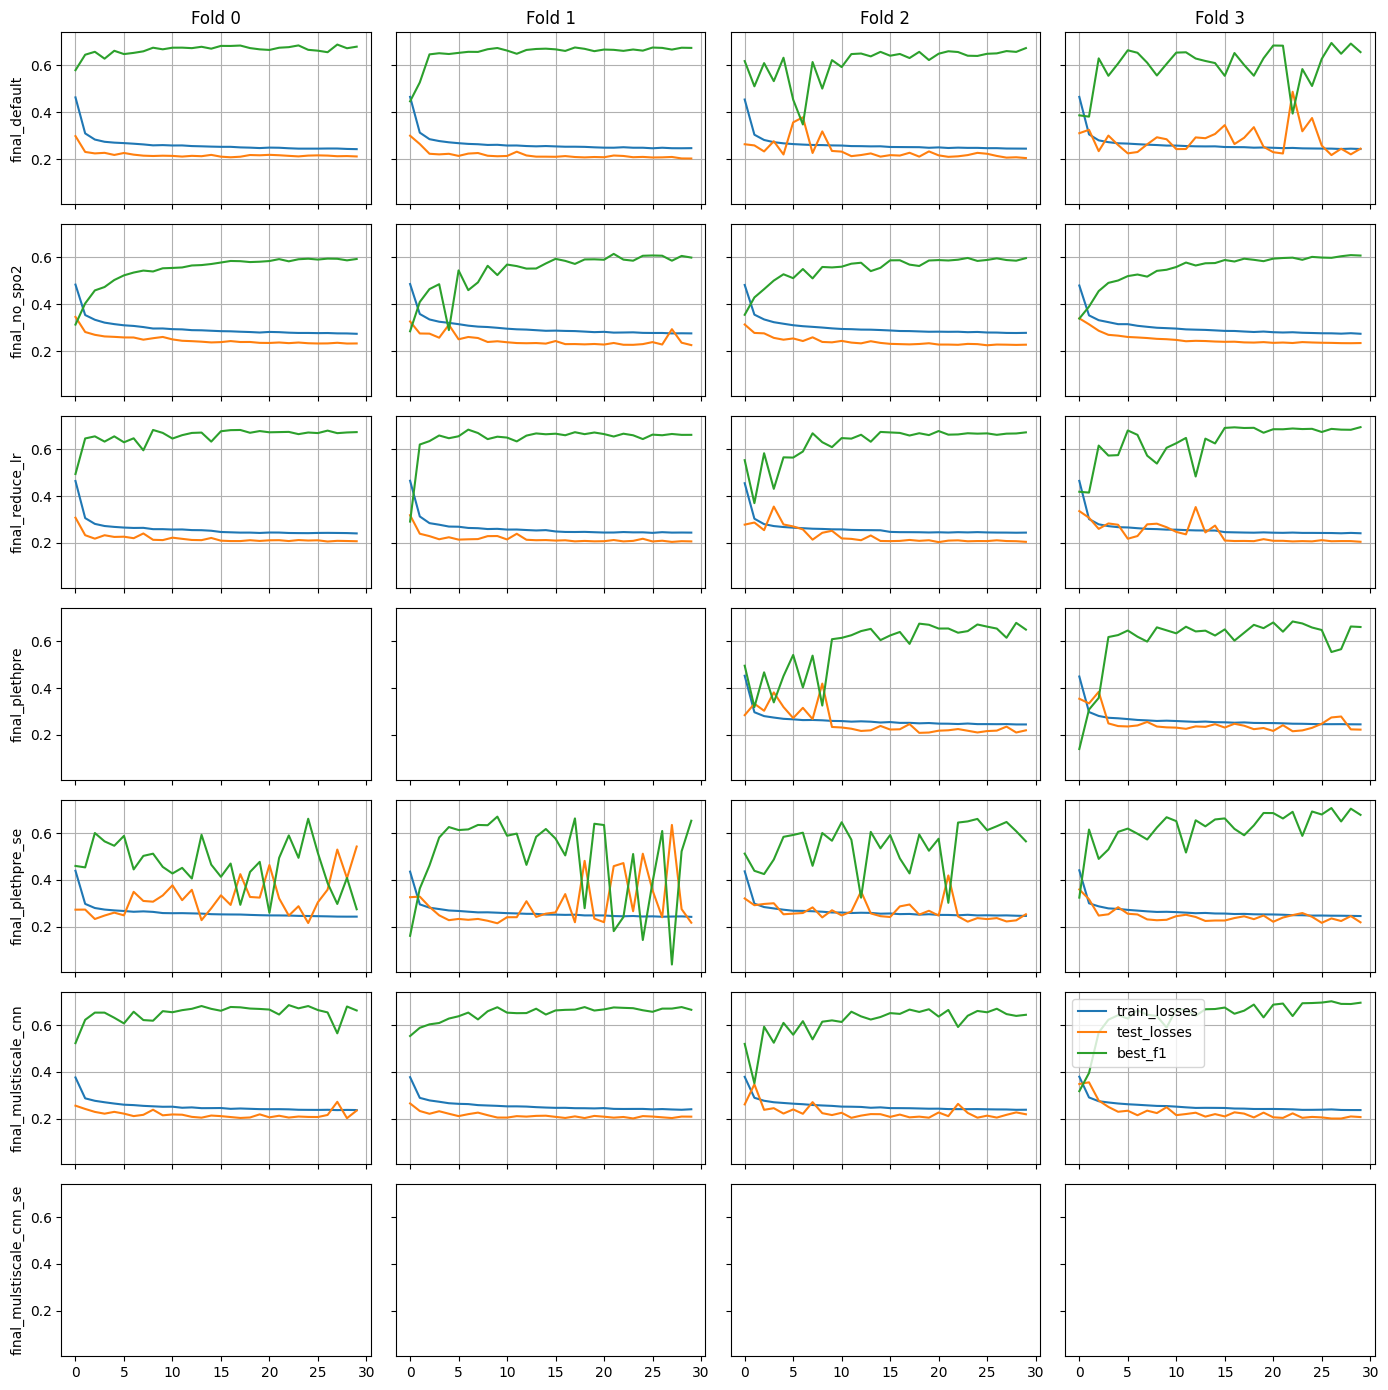

In [16]:
_, axs = plt.subplots(len(runs), 4, figsize=(14, len(runs)*2), sharex=True, sharey=True)
for row, run in enumerate(runs):
    for col, fold in enumerate(range(4)):
        if row == 0:
            axs[row, col].set_title(f'Fold {fold}')
        if col == 0:
            axs[row, col].set_ylabel(run)
        if os.path.isfile(f'../wearsed/training/attention_unet/output/{run}/f-{fold}/losses.csv'):
            pd.read_csv(f'../wearsed/training/attention_unet/output/{run}/f-{fold}/losses.csv').plot(ax=axs[row, col], legend=row+col==len(runs)+1)
            axs[row, col].grid()
plt.tight_layout()

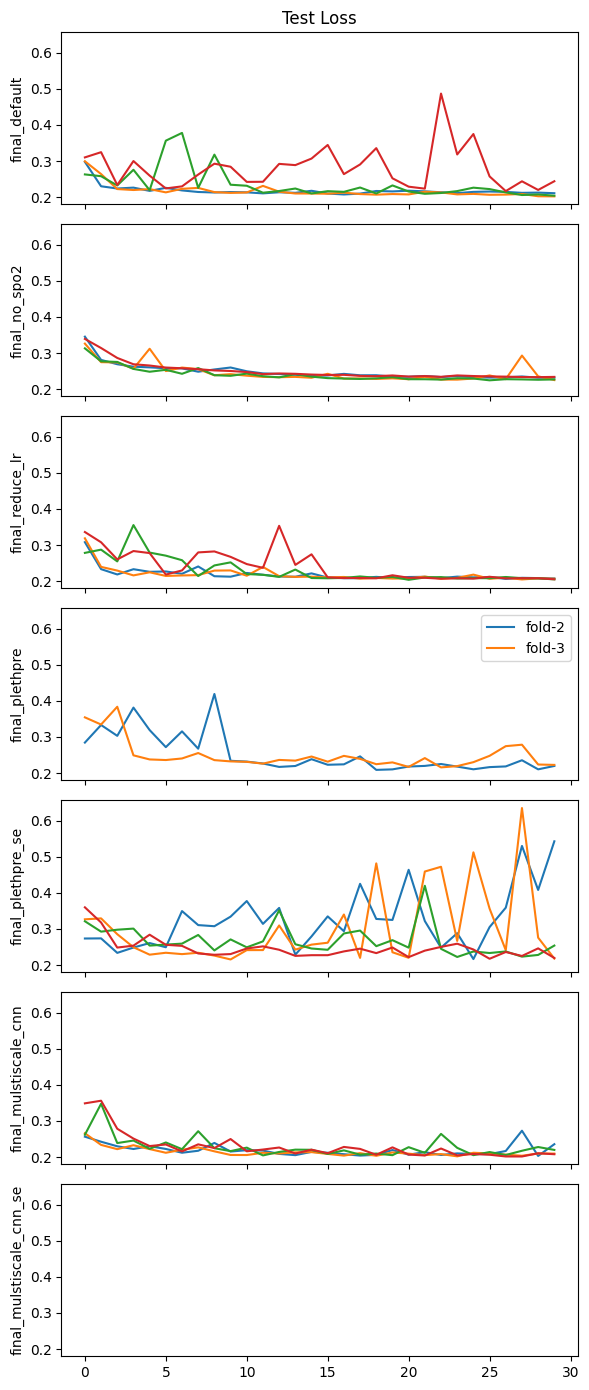

In [17]:
_, axs = plt.subplots(len(runs), 1, figsize=(6, len(runs)*2), sharex=True, sharey=True)
for row, run in enumerate(runs):
    run_losses = {}
    any_exists = False
    for col, fold in enumerate(range(4)):
        if os.path.isfile(f'../wearsed/training/attention_unet/output/{run}/f-{fold}/losses.csv'):
            run_losses[f'fold-{fold}'] = pd.read_csv(f'../wearsed/training/attention_unet/output/{run}/f-{fold}/losses.csv')['test_losses']
            any_exists = True
    if any_exists:
        pd.DataFrame(run_losses).plot(ax=axs[row], legend=row==3)
    axs[row].set_ylabel(run)
axs[0].set_title('Test Loss')
plt.tight_layout()

### Results

In [18]:
data = pd.read_csv('58_final_results.csv')

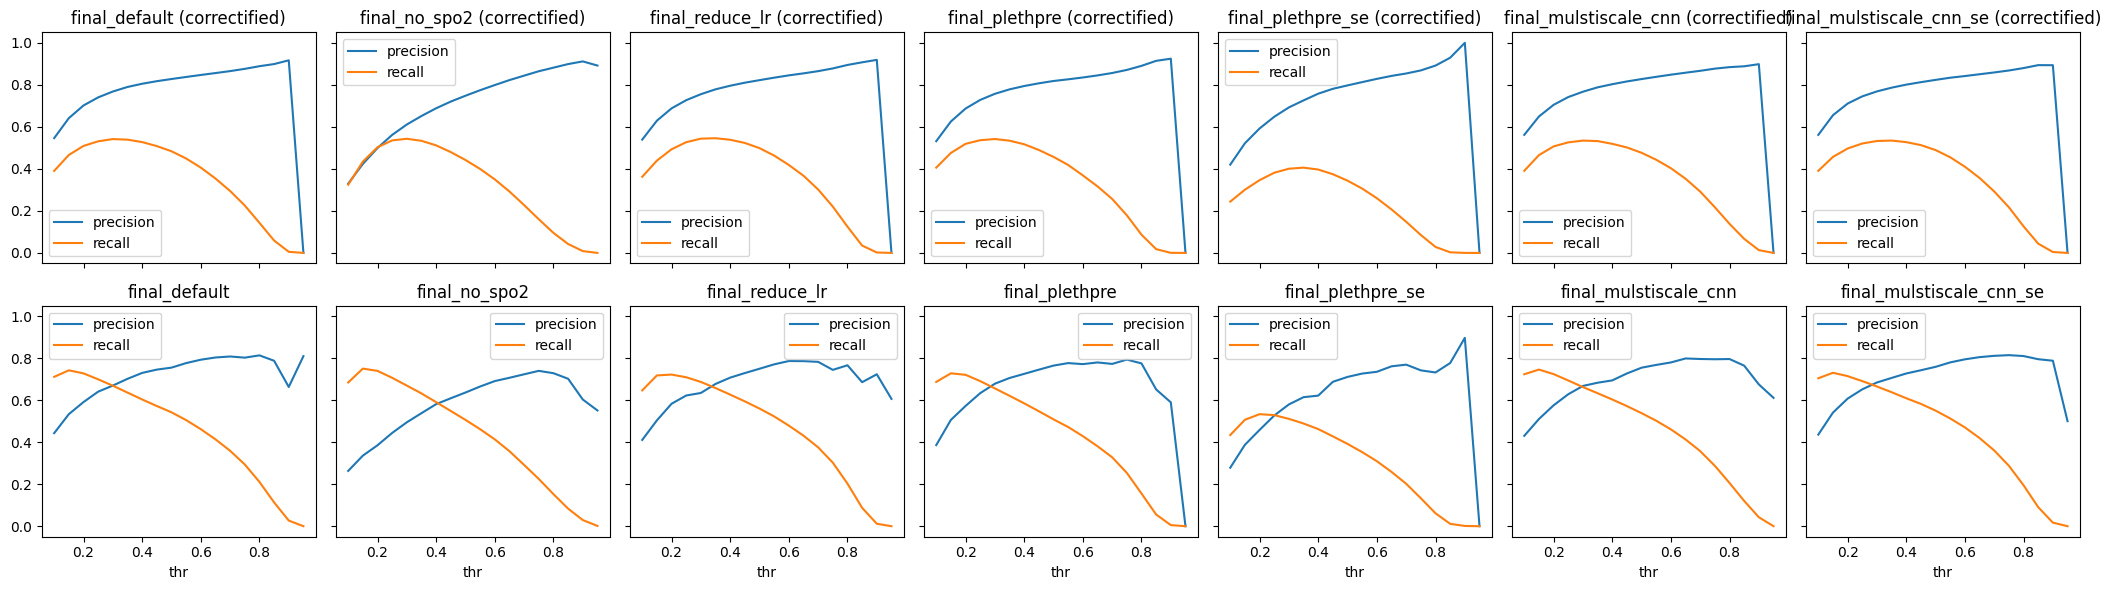

In [19]:
_, axs = plt.subplots(2, len(runs), figsize=(len(runs)*3, 6), sharex=True, sharey=True)
for col, run in enumerate(runs):
    for row, correctify in enumerate([True, False]):
        data[(data['run'] == run) & (data['correctify'] == correctify)][['thr', 'precision', 'recall']].set_index('thr').iloc[1:20].plot(ax=axs[row, col], title=f'{run}{' (correctified)' if correctify else ''}')
plt.tight_layout()

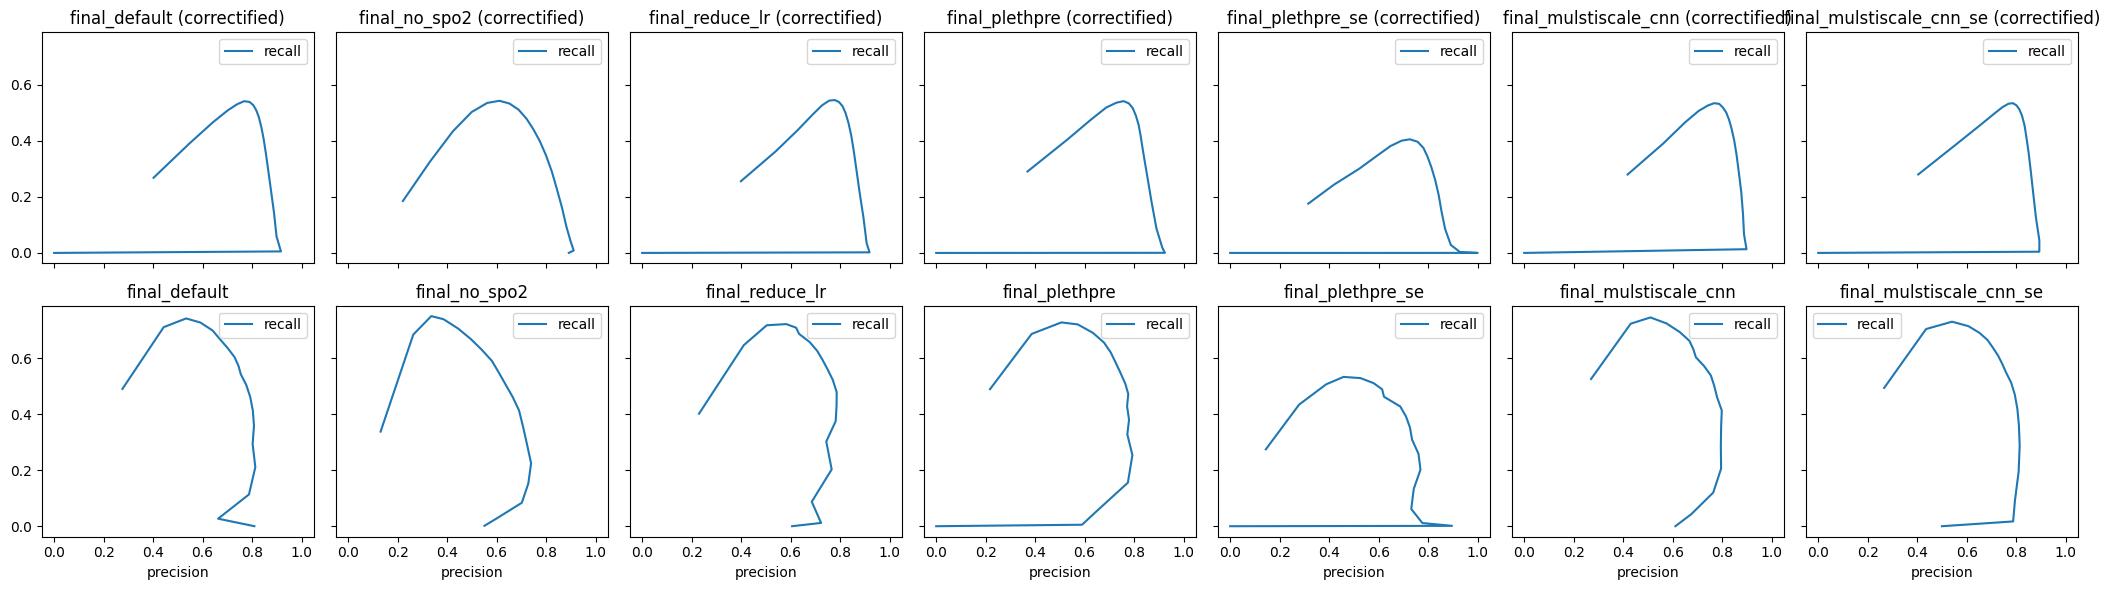

In [20]:
_, axs = plt.subplots(2, len(runs), figsize=(len(runs)*3, 6), sharex=True, sharey=True)
for col, run in enumerate(runs):
    for row, correctify in enumerate([True, False]):
        data[(data['run'] == run) & (data['correctify'] == correctify)][['precision', 'recall']].set_index('precision').plot(ax=axs[row, col], title=f'{run}{' (correctified)' if correctify else ''}')
plt.tight_layout()

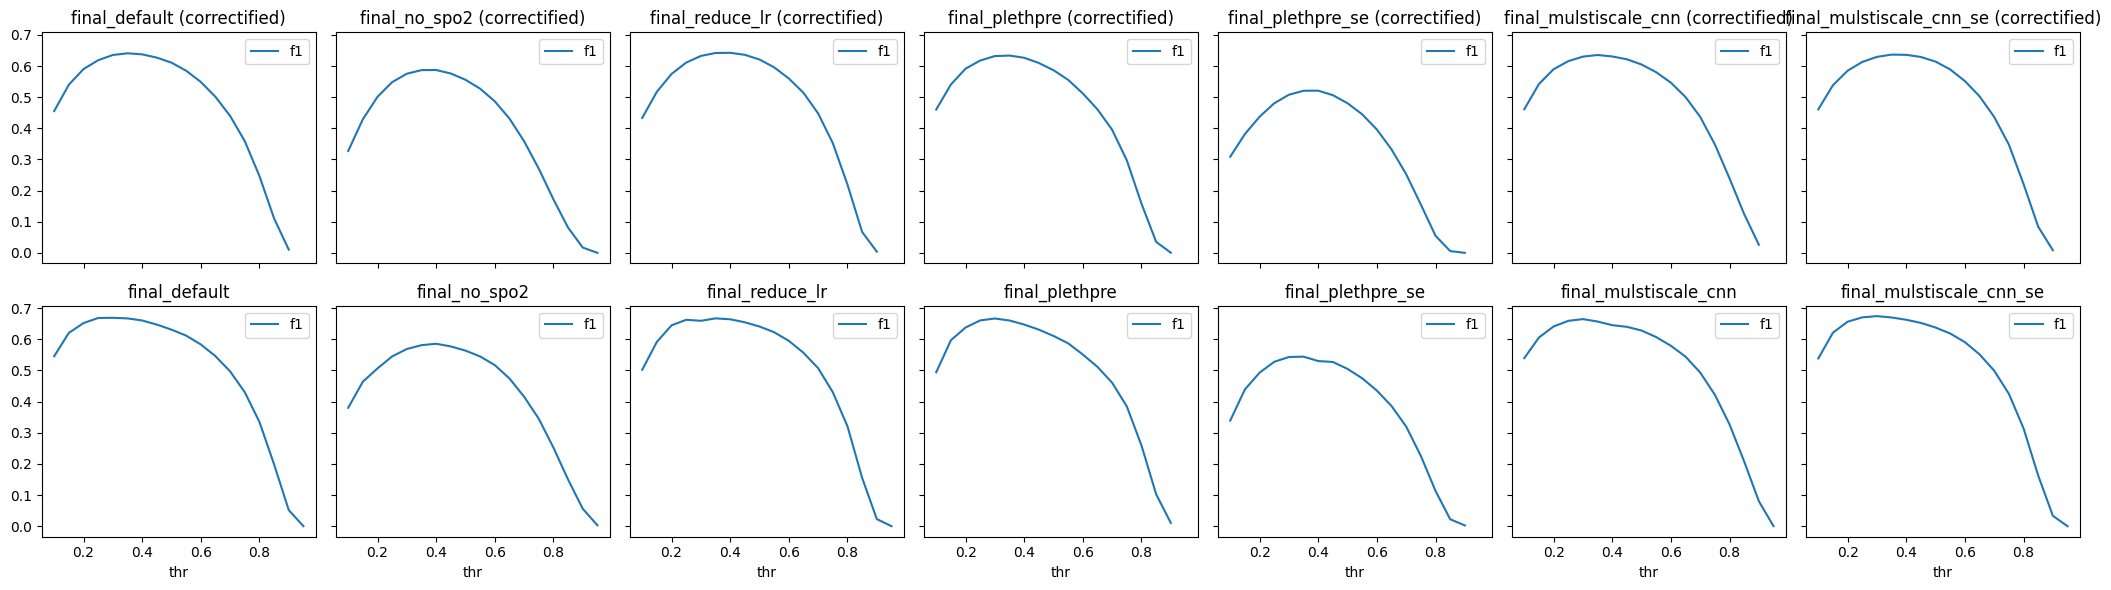

In [21]:
_, axs = plt.subplots(2, len(runs), figsize=(len(runs)*3, 6), sharex=True, sharey=True)
for col, run in enumerate(runs):
    for row, correctify in enumerate([True, False]):
        data[(data['run'] == run) & (data['correctify'] == correctify)][['thr', 'f1']].set_index('thr').iloc[1:20].plot(ax=axs[row, col], title=f'{run}{' (correctified)' if correctify else ''}')
plt.tight_layout()

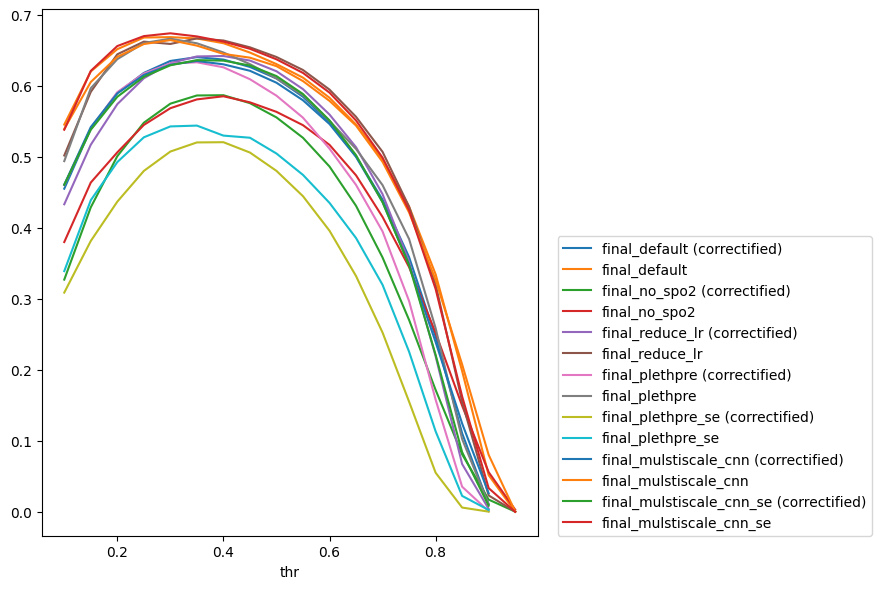

In [22]:
_, axs = plt.subplots(1, 1, figsize=(9, 6), sharex=True, sharey=True)
for col, run in enumerate(runs):
    for row, correctify in enumerate([True, False]):
        f1_by_thr = data[(data['run'] == run) & (data['correctify'] == correctify)][['thr', 'f1']].set_index('thr')
        f1_by_thr.columns = [f'{run}{' (correctified)' if correctify else ''}']
        f1_by_thr.iloc[1:20].plot(ax=axs)
plt.legend(loc=(1.04, 0))
plt.tight_layout()

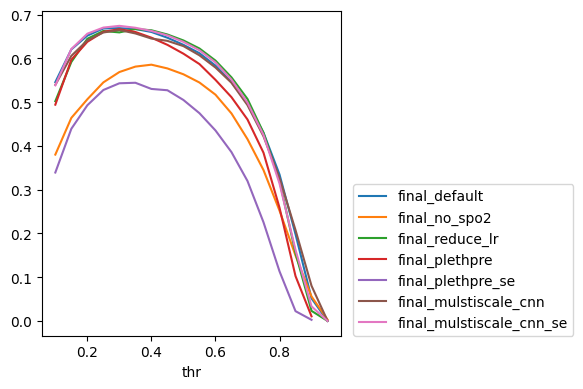

In [23]:
_, axs = plt.subplots(1, 1, figsize=(6, 4), sharex=True, sharey=True)
for col, run in enumerate(runs):
        f1_by_thr = data[(data['run'] == run) & (data['correctify'] == False)][['thr', 'f1']].set_index('thr')
        f1_by_thr.columns = [run]
        f1_by_thr.iloc[1:20].plot(ax=axs)
plt.legend(loc=(1.04, 0))
plt.tight_layout()

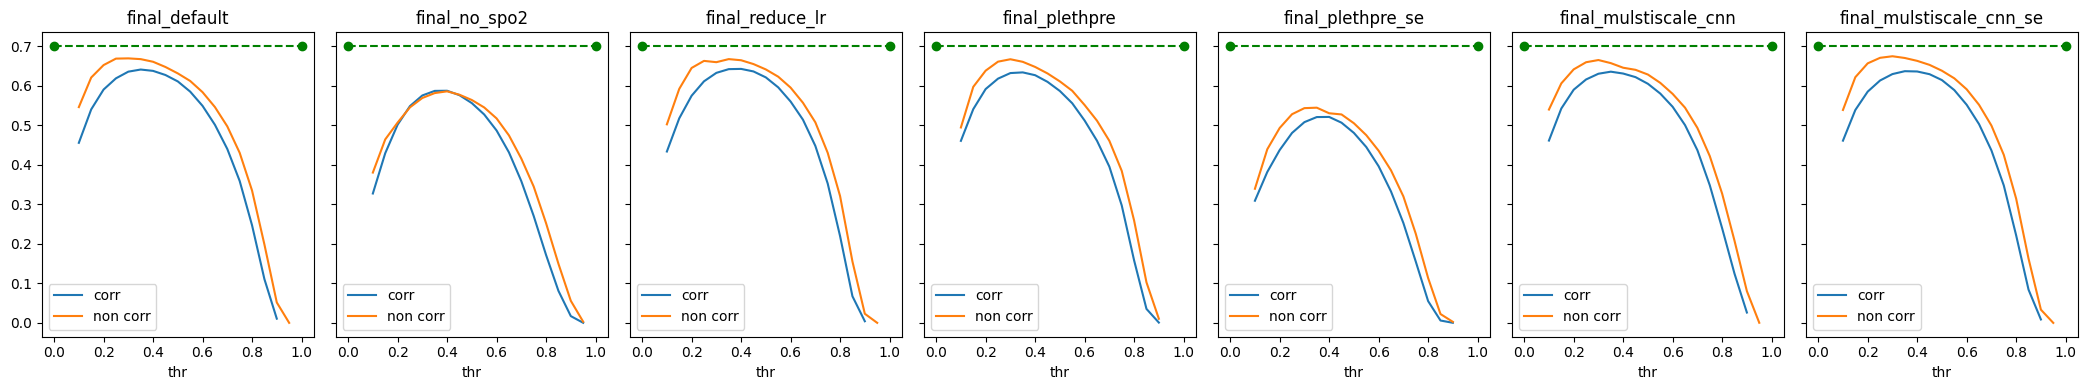

In [24]:
_, axs = plt.subplots(1, len(runs), figsize=(len(runs)*3, 4), sharex=True, sharey=True)
for i, run in enumerate(runs):
    for correctify in [True, False]:
        f1_by_thr = data[(data['run'] == run) & (data['correctify'] == correctify)][['thr', 'f1']].set_index('thr')
        f1_by_thr.columns = [f'{'corr' if correctify else 'non corr'}']
        f1_by_thr.iloc[1:20].plot(ax=axs[i], title=run)
    axs[i].plot([0,1], [0.7]*2, color='green', linestyle='dashed', marker='o')
plt.tight_layout()

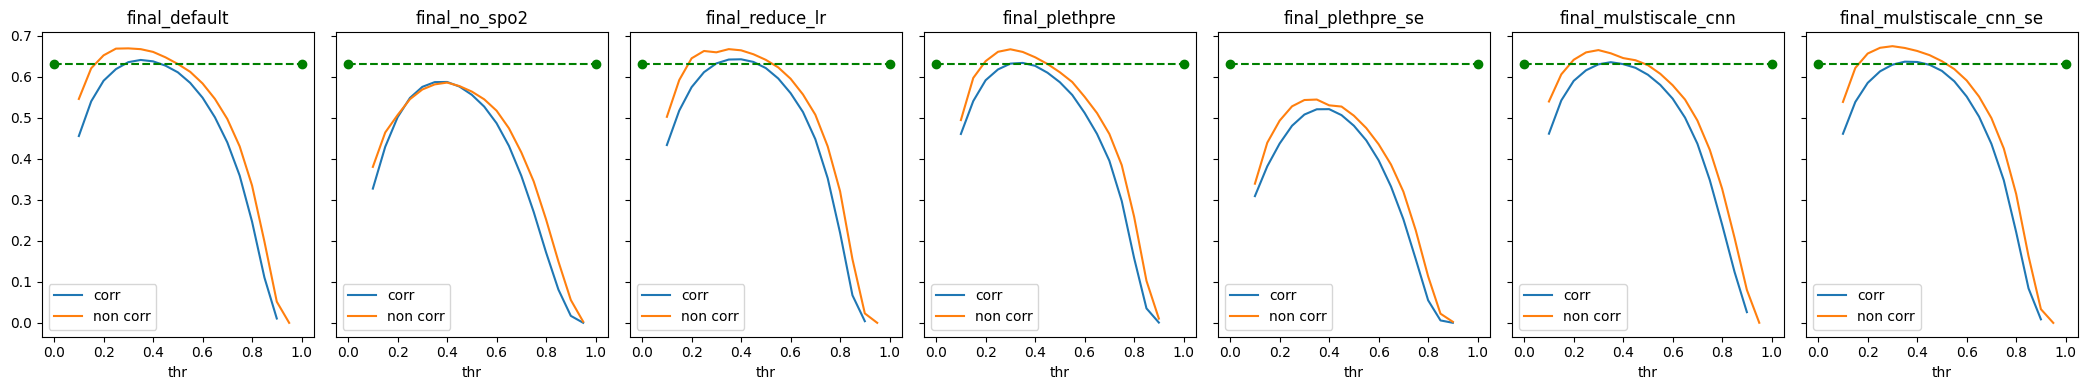

In [25]:
_, axs = plt.subplots(1, len(runs), figsize=(len(runs)*3, 4), sharex=True, sharey=True)
for i, run in enumerate(runs):
    for correctify in [True, False]:
        f1_by_thr = data[(data['run'] == run) & (data['correctify'] == correctify)][['thr', 'f1']].set_index('thr')
        f1_by_thr.columns = [f'{'corr' if correctify else 'non corr'}']
        f1_by_thr.iloc[1:20].plot(ax=axs[i], title=run)
    axs[i].plot([0,1], [0.63]*2, color='green', linestyle='dashed', marker='o')
plt.tight_layout()